## Zebra Puzzle


1. There are five houses.

2. The Englishman lives in the red house.

3. The Spaniard owns the dog.

4. Coffee is drunk in the green house.

5. The Ukrainian drinks tea.

6. The green house is immediately to the right of the ivory house.

7. The Old Gold smoker owns snails.

8. Kools are smoked in the yellow house.

9. Milk is drunk in the middle house.

10. The Norwegian lives in the first house.

11. The man who smokes Chesterfields lives in the house next to the man with the fox.

12. Kools are smoked in a house next to the house where the horse is kept.

13. The Lucky Strike smoker drinks orange juice.

14. The Japanese smokes Parliaments.

15. The Norwegian lives next to the blue house.

**Who drinks water? Who owns the zebra?**

Each house is painted a different color, and their inhabitants are of different nationalities, own different pets, drink different beverages and smoke different brands of American cigarettes.

### Defining the problem

**Properties**

* Nationality
* Colors
* Pets
* Drinks
* Smokes


**Assignments**

* Location
* Nex to
* Immediately right
* First
* Middle

**Assignments**:

* Deduce

* Try: assign 1 thing and compute the probabilities of the rest.

5 houses <-> 5 properties each house

In [1]:
num_options = (5*4*3*2*1)**5 # 5!**5

In [2]:
print(num_options)

24883200000


In [3]:
houses = [1,2,3,4,5]

In [4]:
f = lambda x: x

In [5]:
orderings = f(houses)

In [6]:
orderings

[1, 2, 3, 4, 5]

`f` should be the permutations function

In [7]:
from itertools import *

In [8]:
len(list(permutations(orderings)))

120

Interesting approach: everything is an `int` between 1-5. The comparison is easy and fast. `Englishman is red` == `1 is 1`

In [10]:
import itertools

houses = [1, 2, 3, 4, 5]
orderings = list(itertools.permutations(houses))

def imright(h1, h2):
    "House h1 is immediately right of h2 if h1-h2 == 1."
    return h1-h2 == 1

def nextto(h1, h2):
    "Two houses are next to each other if they differ by 1."
    return abs(h1-h2) == 1

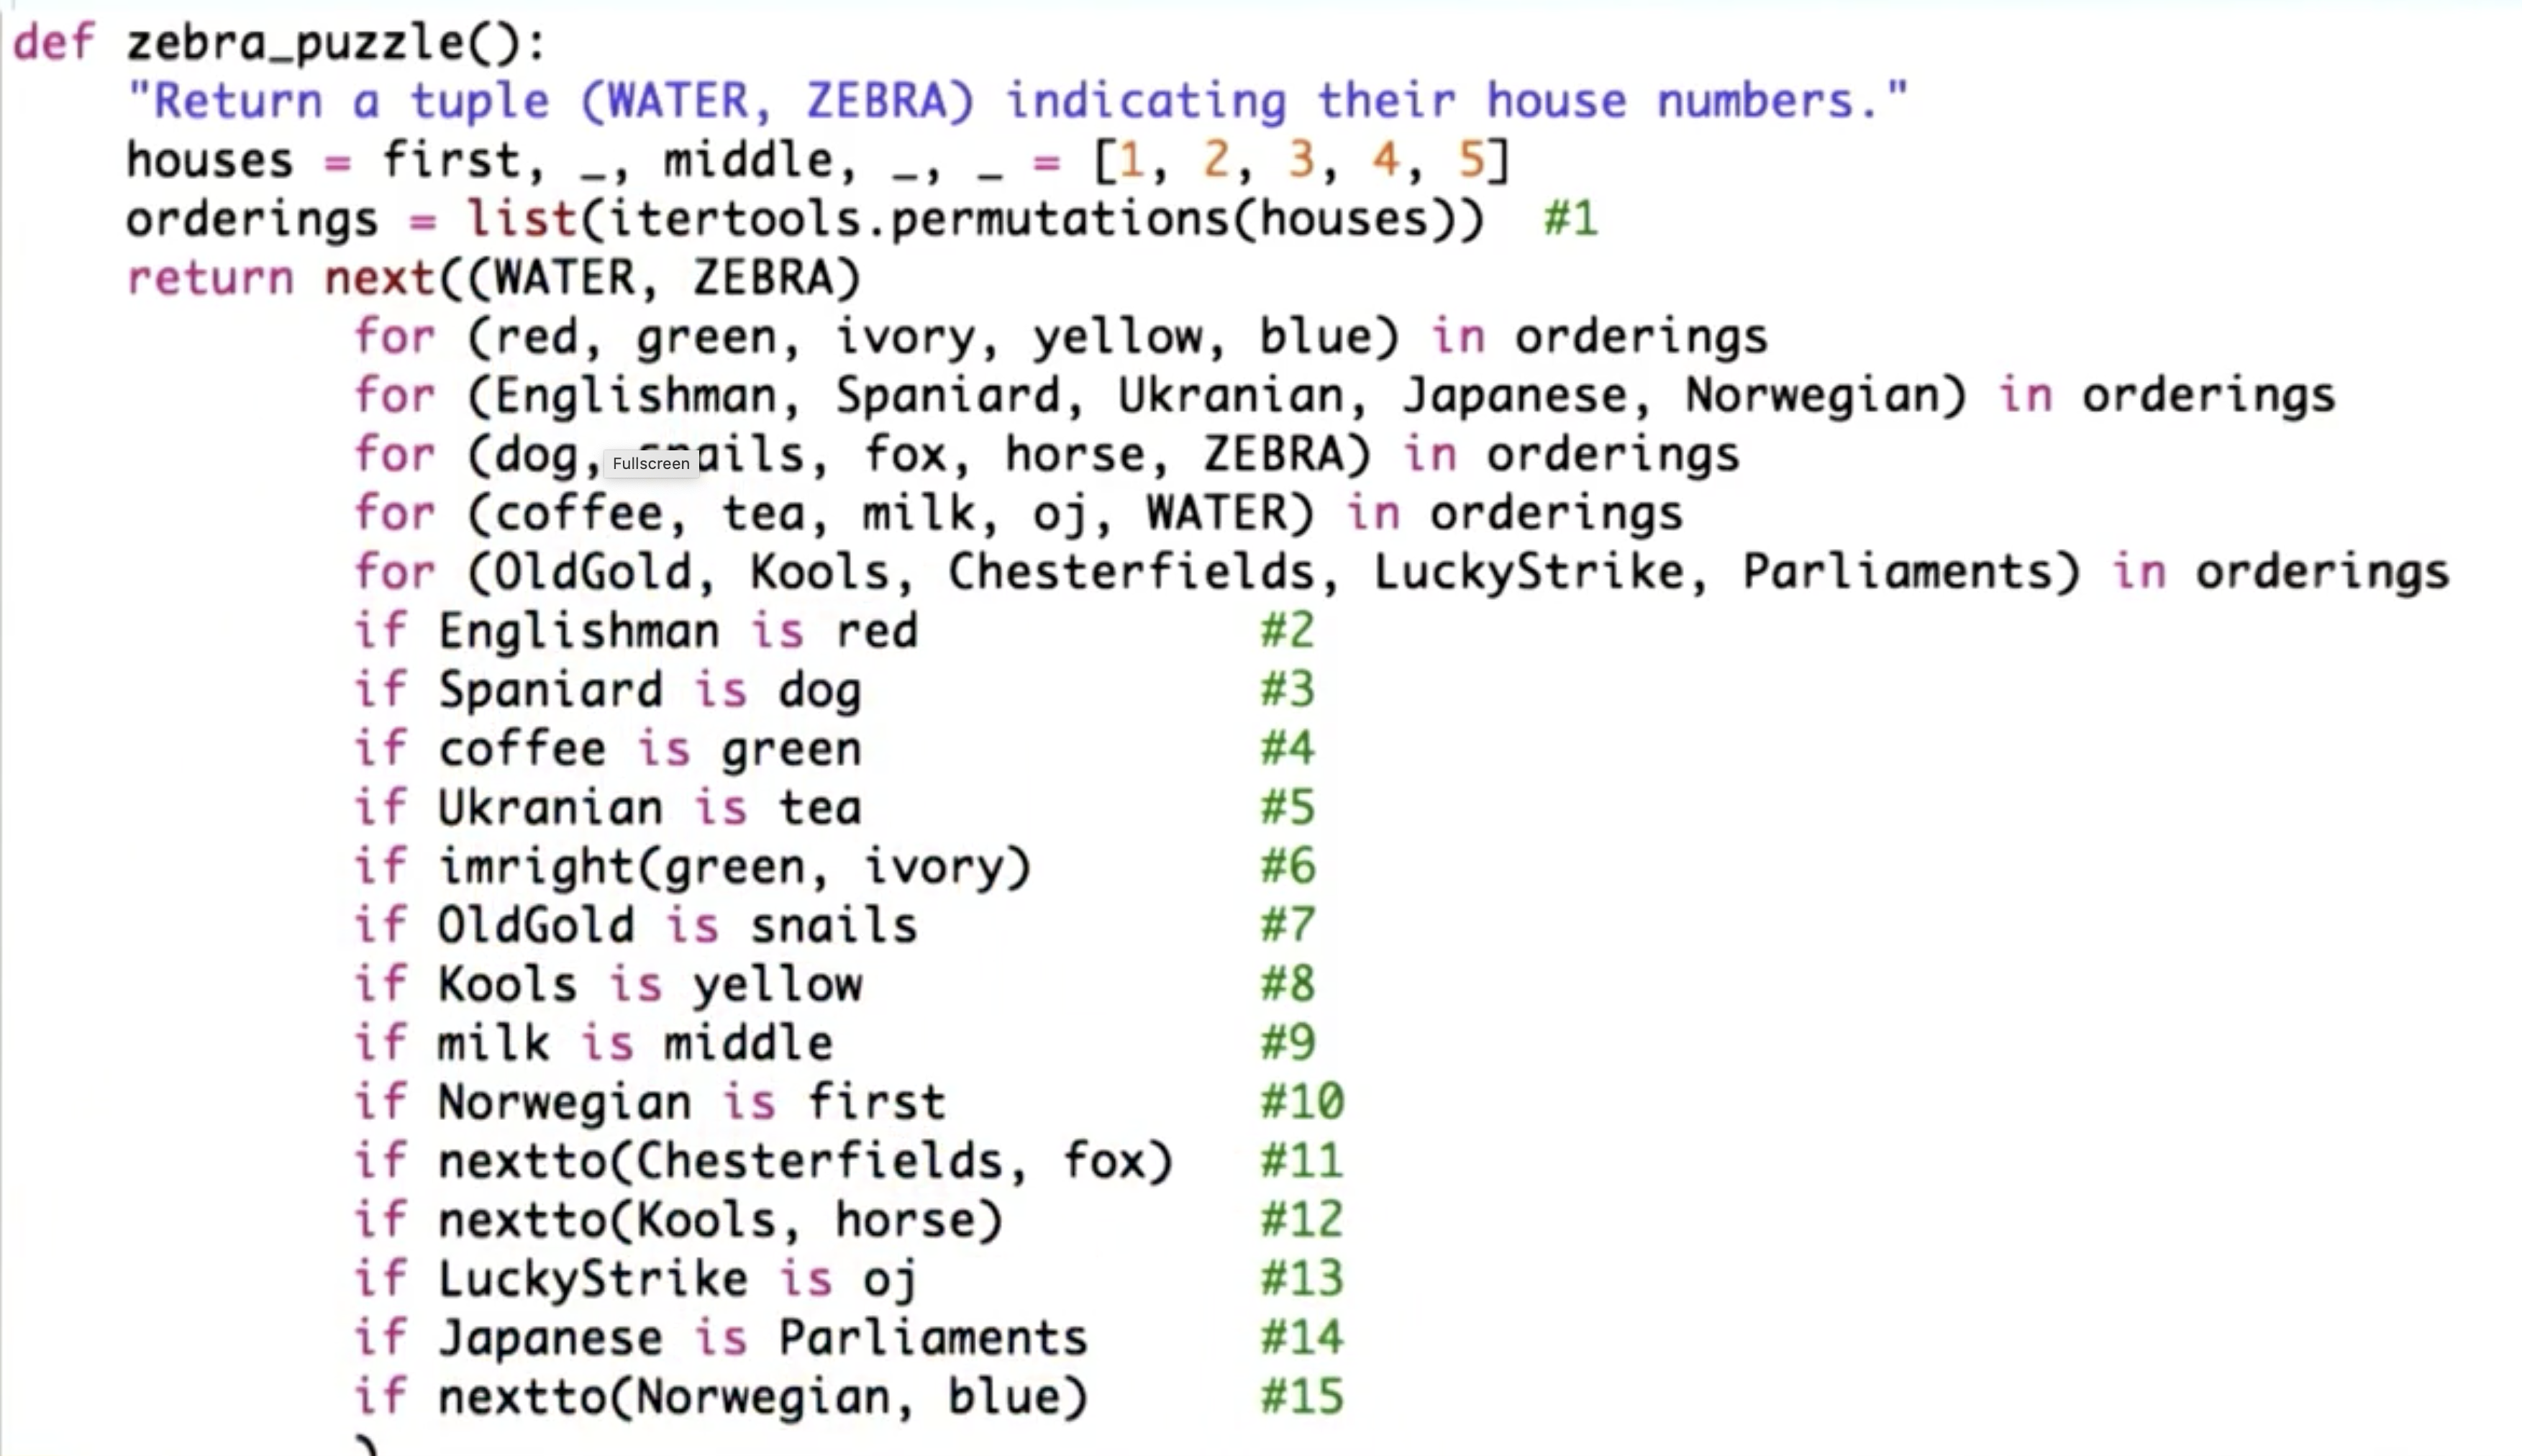

We can re-arange constraints. For example `Englishman is red` can be below the second `for` because we already have the variables/info we need. We don't have to compute te comparison for every combination.

In [11]:
def zebra_puzzle():
    "Return a tuple (WATER, ZEBRA indicating their house numbers."
    houses = first, _, middle, _, _ = [1, 2, 3, 4, 5]
    orderings = list(itertools.permutations(houses)) # 1
    return next((WATER, ZEBRA)
                for (red, green, ivory, yellow, blue) in orderings
                if imright(green, ivory)
                for (Englishman, Spaniard, Ukranian, Japanese, Norwegian) in orderings
                if Englishman is red
                if Norwegian is first
                if nextto(Norwegian, blue)
                for (coffee, tea, milk, oj, WATER) in orderings
                if coffee is green
                if Ukranian is tea
                if milk is middle
                for (OldGold, Kools, Chesterfields, LuckyStrike, Parliaments) in orderings
                if Kools is yellow
                if LuckyStrike is oj
                if Japanese is Parliaments
                for (dog, snails, fox, horse, ZEBRA) in orderings
                if Spaniard is dog
                if OldGold is snails
                if nextto(Chesterfields, fox)
                if nextto(Kools, horse)
                )

In [12]:
zebra_puzzle()

(1, 5)

## Aspects writing a program

* Correct
* Efficient
* Debuggability


**Aspect oriented programmin**: separate the previous 3 aspects in different parts of code.

## Generators

In [13]:
from itertools import islice


def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

Wrong example in the course. Due to Python short-circuiting, I need to evaluate `(end is None)` first, otherwise it will try to evaluate `start - None`, which will throw an error.

In [14]:
def ints(start, end=None):
    i = start
    while (end is None) or (i <= end):
        yield i
        i = i + 1


def all_ints(start, end=None):
    "Generate integers in the order 0, +1, -1, +2, -2, +3, -3, ..."
    # Your code here.
    i = start
    while (end is None) or (i <= end):
        yield i
        if i != 0:
            yield -i
        i = i + 1

In [15]:
take(10, all_ints(0))

[0, 1, -1, 2, -2, 3, -3, 4, -4, 5]

Better option based on proposed solution (without args):

In [16]:
def all_ints():
    "Generate integers in the order 0, +1, -1, +2, -2, +3, -3, ..."
    yield 0
    i = 1
    while True:
        yield i
        yield -i
        i = i + 1

In [17]:
take(10, all_ints())

[0, 1, -1, 2, -2, 3, -3, 4, -4, 5]

In [18]:
def all_ints():
    "Generate integers in the order 0, +1, -1, +2, -2, +3, -3, ..."
    yield 0
    for i in ints(1):
        yield i
        yield -i

In [19]:
take(10, all_ints())

[0, 1, -1, 2, -2, 3, -3, 4, -4, 5]

Function to wrap an iterable so that we can count at the end how many items we have iterated through. For example wrapping `c(orderings)` in the zebra puzzle.

In [20]:
def c(sequence):
    """
    Generate items in sequence; keeping counts as we go.
    c.starts is the number of sequences started
    c.items is the number of items generated.
    """
    try:
        c.starts += 1
    except AttributeError:
        c.starts = 0
    for item in sequence:
        try:
            c.items += 1
        except AttributeError:
            c.items = 0
        yield item

In [21]:
[i for i in c([1,2,3])]

[1, 2, 3]

In [24]:
c.starts, c.items

(0, 2)

## Solve arithmetic

 ODD +
 ODD
 =
EVEN

Where each letter is a number.

Option 1:

Check al combinations by substituting the letters for numbers and see which evaluates to `True`.

`10! options`


Concepts <-> Representations:

* Equations
    * Original <-> `str`
    * Filled <-> `str`
* Letters <-> `str`
* Digits <-> `str`
* Assignment <-> table/mapping `str.translate`
    * Letter - digit
* Evaluation <-> `eval`

In [25]:
table =  str.maketrans("ABC", "123")

In [26]:
f = "A + B == C"

In [27]:
f.translate(table)

'1 + 2 == 3'

In [28]:
eval(f.translate(table))

True

In [30]:
import string, re

def valid(f):
    "Formula f is valid iff it has no numbers with leading zero and evals true."
    try:
        return not re.search(r"\b0[0-9]", f) and eval(f) is True
    except ArithmeticError:
        return False

`0` first is for octal numbers.

In [31]:
eval("012")

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (<string>, line 1)

In [32]:
i = 012

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (<ipython-input-32-ea0315765b9a>, line 1)

In [33]:
# -------------
# User Instructions
#
# Write a function, solve(formula) that solves cryptarithmetic puzzles.
# The input should be a formula like 'ODD + ODD == EVEN', and the
# output should be a string with the digits filled in, or None if the
# problem is not solvable.
#
# Note that you will not be able to run your code yet since the
# program is incomplete. Please SUBMIT to see if you are correct.

import string, re


def solve(formula):
    """Given a formula like 'ODD + ODD == EVEN', fill in digits to solve it.
    Input formula is a string; output is a digit-filled-in string or None."""
    for f in fill_in(formula):
        if is_valid(f):
            return f


# assume: def fill_in(formula):
#        "Generate all possible fillings-in of letters in formula with digits."


def is_valid(f):
    """Formula f is valid if and only if it has no
    numbers with leading zero, and evals true."""
    try:
        return not re.search(r"\b0[0-9]", f) and eval(f) is True
    except ArithmeticError:
        return False

I'll try to implement the `fill_in()` myself before.

In [34]:
table =  str.maketrans("ABC", "123")

In [35]:
max_nums = len(set("ODDODDEVEN"))

I need to generate translation tables between those 5 caracters and all the possible permutations of 5 digits.

In [36]:
list(string.digits)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [37]:
take(5, itertools.permutations(string.digits, 5))

[('0', '1', '2', '3', '4'),
 ('0', '1', '2', '3', '5'),
 ('0', '1', '2', '3', '6'),
 ('0', '1', '2', '3', '7'),
 ('0', '1', '2', '3', '8')]

In [38]:
str_permuts = ["".join(permut) for permut in itertools.permutations(string.digits, 5)]

In [39]:
str_permuts[:10]

['01234',
 '01235',
 '01236',
 '01237',
 '01238',
 '01239',
 '01243',
 '01245',
 '01246',
 '01247']

In [40]:
set_chars = list(set("ODDODDEVEN"))

In [41]:
chars = "".join(set_chars)

In [42]:
chars

'EDNVO'

In [43]:
tables = [str.maketrans(chars, permut) for permut in str_permuts]

In [44]:
tables[:5]

[{69: 48, 68: 49, 78: 50, 86: 51, 79: 52},
 {69: 48, 68: 49, 78: 50, 86: 51, 79: 53},
 {69: 48, 68: 49, 78: 50, 86: 51, 79: 54},
 {69: 48, 68: 49, 78: 50, 86: 51, 79: 55},
 {69: 48, 68: 49, 78: 50, 86: 51, 79: 56}]

In [45]:
all_formulas = ["ODD + ODD == EVEN".translate(tab) for tab in tables]

In [46]:
valid_formulas = [f for f in all_formulas if valid(f)]

In [47]:
len(all_formulas)

30240

In [48]:
len(valid_formulas)

2

In [49]:
valid_formulas

['655 + 655 == 1310', '855 + 855 == 1710']

In [50]:
discard = string.digits + string.punctuation + string.whitespace

In [51]:
def fill_in(formula: str):

    letters = [c for c in formula if c.isalpha and c not in discard]
    letters = set(letters)
    letters = "".join(letters)

    num_permuts = [
        "".join(permut)
        for permut in itertools.permutations(string.digits, len(letters))
    ]

    tables = [str.maketrans(letters, permut) for permut in num_permuts]

    return [formula.translate(tab) for tab in tables]

In [52]:
fill_in("ODD == EVEN2")[:10]

['411 == 03022',
 '511 == 03022',
 '611 == 03022',
 '711 == 03022',
 '811 == 03022',
 '911 == 03022',
 '311 == 04022',
 '511 == 04022',
 '611 == 04022',
 '711 == 04022']

Proposed solution + the other functions.

Uses yield to save memory. I had not thought of using regex for this :/

In [53]:
import string, re


def solve(formula):
    """Given a formula like 'ODD + ODD == EVEN', fill in digits to solve it.
    Input formula is a string; output is a digit-filled-in string or None."""

    for f in fill_in(formula):
        if is_valid(f):
            print(f)
            # return f


def fill_in(formula: str):
    letters = "".join(set(re.findall(r"[A-Z]", formula)))

    for digits in itertools.permutations(string.digits, len(letters)):
        table = str.maketrans(letters, "".join(digits))
        yield formula.translate(table)


def is_valid(f):
    """Formula f is valid if and only if it has no
    numbers with leading zero, and evals true."""
    try:
        return not re.search(r"\b0[0-9]", f) and eval(f) is True
    except ArithmeticError:
        return False

In [54]:
take(10, fill_in("ODD == EVEN2"))

['411 == 03022',
 '511 == 03022',
 '611 == 03022',
 '711 == 03022',
 '811 == 03022',
 '911 == 03022',
 '311 == 04022',
 '511 == 04022',
 '611 == 04022',
 '711 == 04022']

In [55]:
solve("ODD + ODD == EVEN")

655 + 655 == 1310
855 + 855 == 1710


Most of the time is spent in the `valid()` and `eval()` functions. Let's optimize that:

*Law of diminishing returns*.

Options: make eval() calls easier (NO) or make fewer calls.

`eval()` has to build the AST + codegen (expensive)

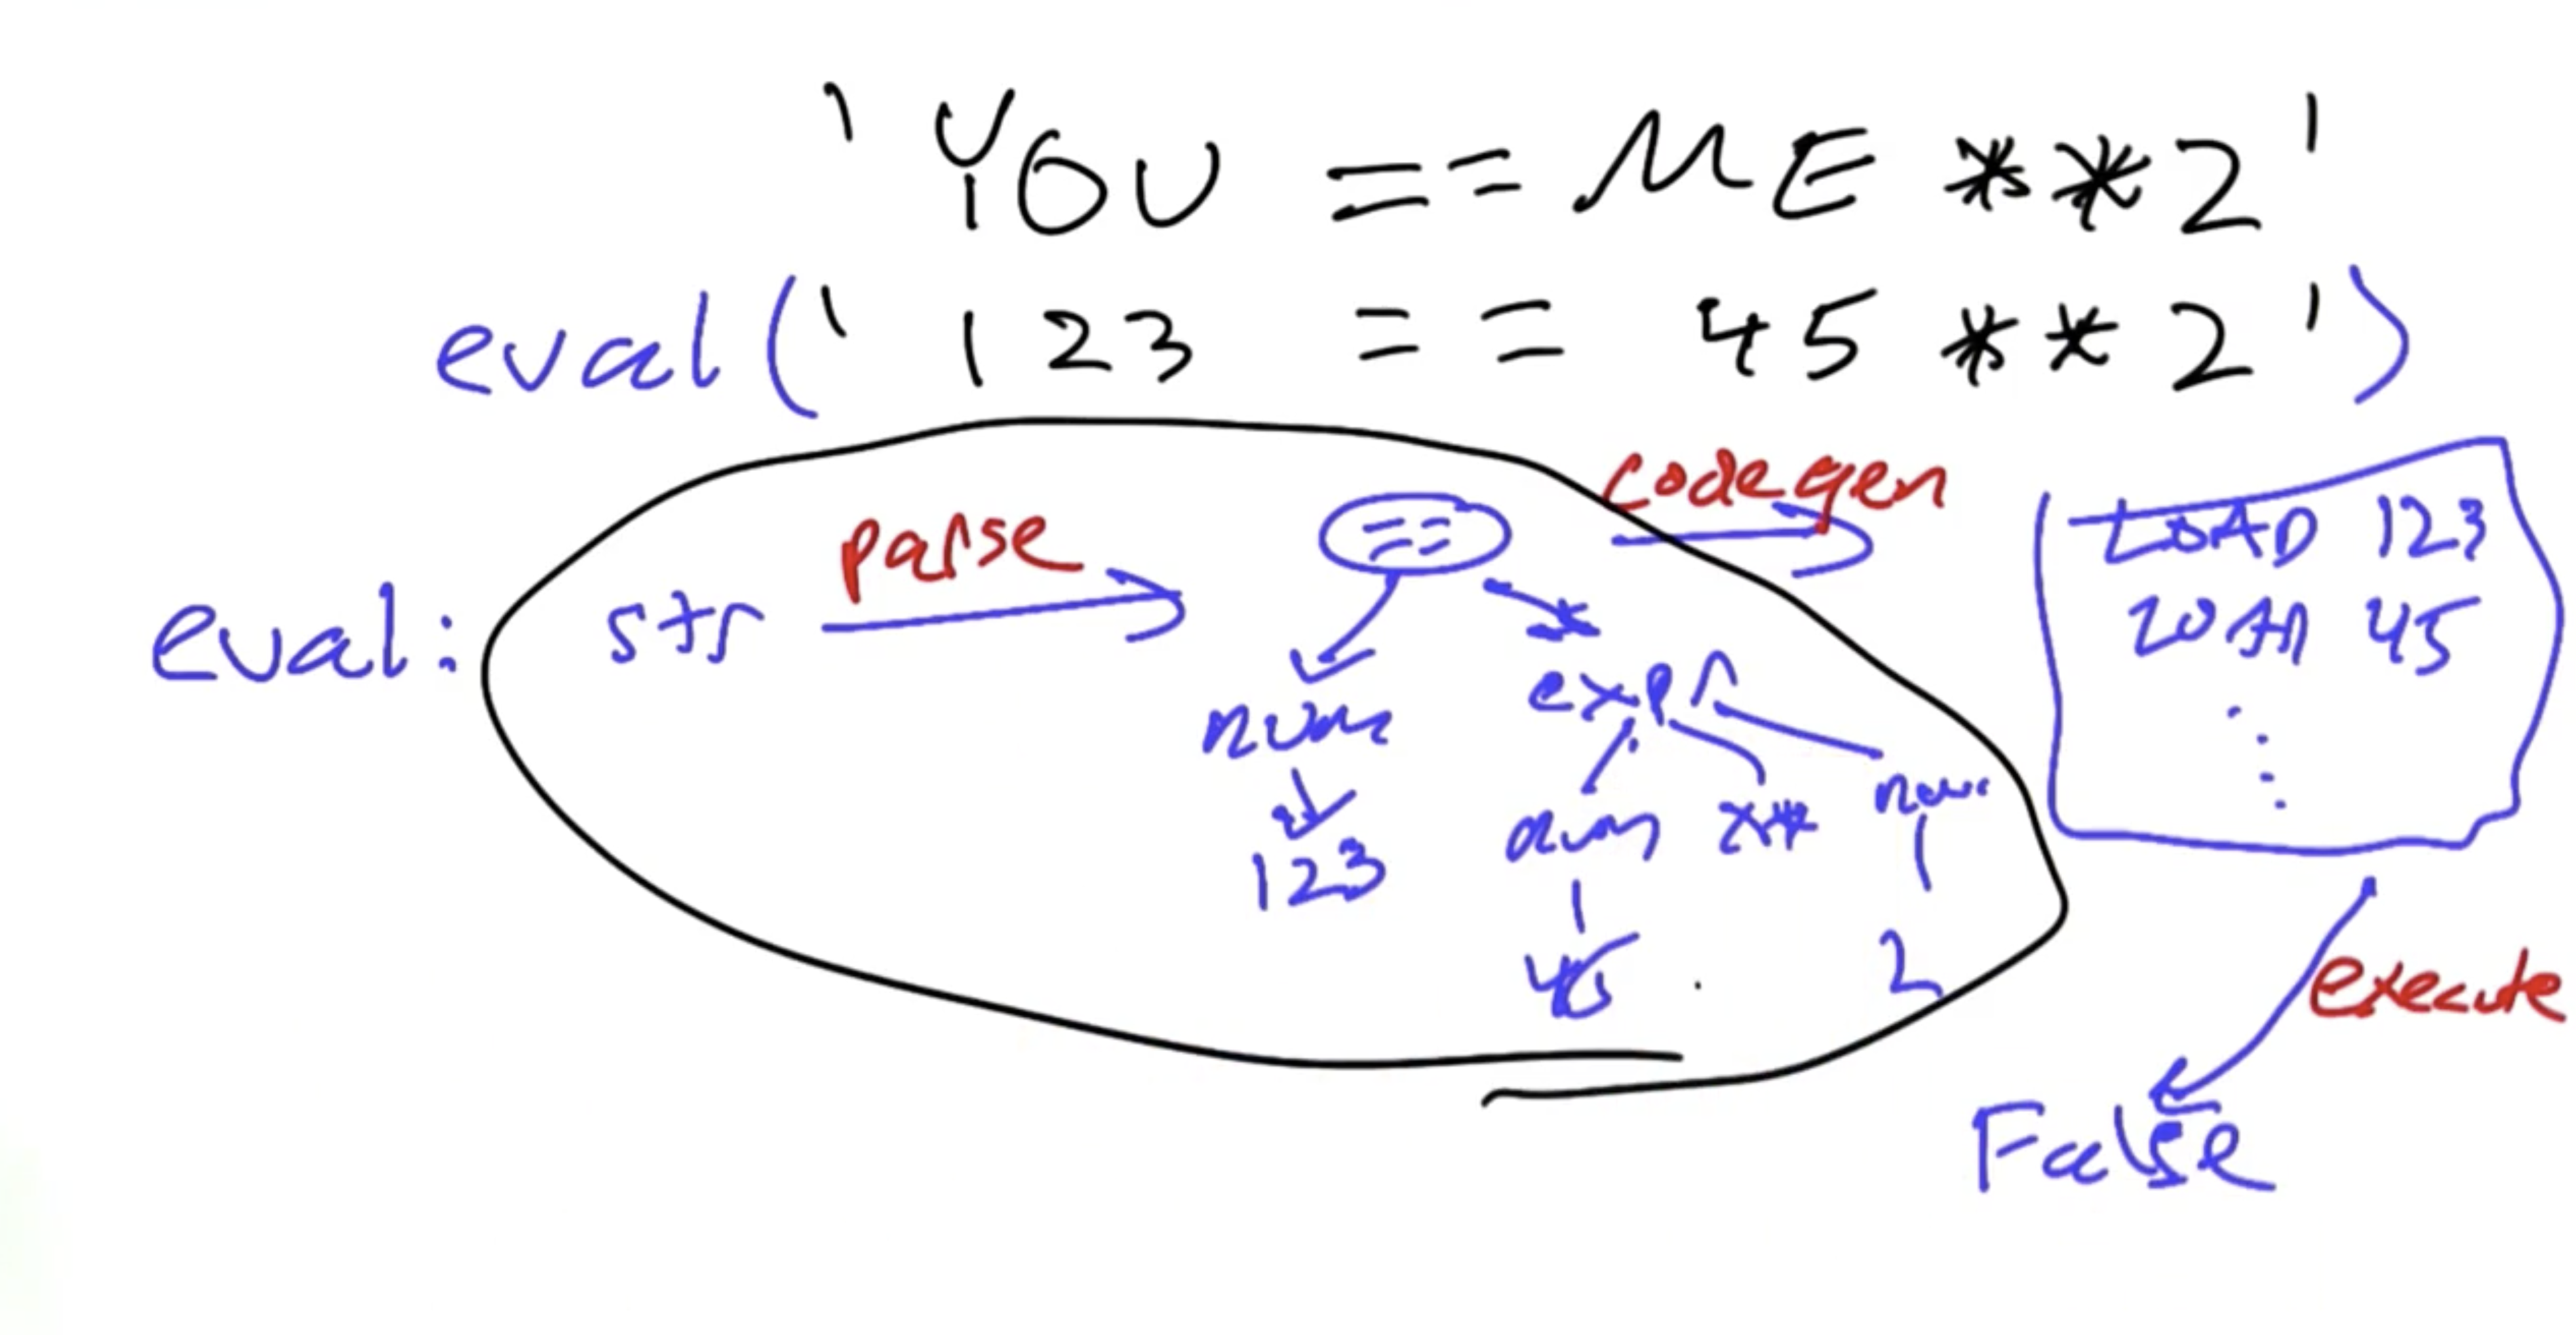

We can use a `lambda`. The `lambda`has to be compiled when we want to solve a formula.

In [56]:
# Write a function, compile_word(word), that compiles a word
# of UPPERCASE letters as numeric digits. For example:
# compile_word('YOU') => '(1*U + 10*O +100*Y)'
# Non-uppercase words should remain unchaged.


def compile_word(word):
    """Compile a word of uppercase letters as numeric digits.
    E.g., compile_word('YOU') => '(1*U+10*O+100*Y)'
    Non-uppercase words unchanged: compile_word('+') => '+'"""
    # Your code here.

    if not word.isupper():
        return word

    start = "("
    end = ")"

    compiled = "'("

    i = 1
    elems = []
    for c in word:
        elems.append(f"{i}*{c}")
        i *= 10

    return start + "+".join(elems) + end

In [57]:
compile_word("+")

'+'

In [58]:
compile_word("YOU")

'(1*Y+10*O+100*U)'

Proposed solution

I liked the `10**i` trick. I was thinking of something similar at first.

`word[::-1]` -> reversing the word.

In [59]:
def compile_word(word):
    """Compile a word of uppercase letters as numeric digits.
    E.g., compile_word('YOU') => '(1*U+10*O+100*Y)'
    Non-uppercase words unchanged: compile_word('+') => '+'"""

    if word.isupper():
        terms = [f"{10**i}*{d}" for (i, d) in enumerate(word[::-1])]

        return "(" + "+".join(terms) + ")"

    else:
        return word

In [60]:
compile_word("+")

'+'

In [61]:
compile_word("YOU")

'(1*U+10*O+100*Y)'

In [89]:
import re
import itertools
import string


def compile_formula(formula, verbose=False):
    """Compile formula into a function. Also return letters found, as a str,
    in same order as parms of function. The first digit of a multi-digit
    number can't be 0. So if YOU is a word in the formula, and the function
    is called with Y eqal to 0, the function should return False."""

    # modify the code in this function.

    letters = "".join(set(re.findall("[A-Z]", formula)))
    first_letters = set(re.findall(r"\b([A-Z])[A-Z]", formula))
    print(first_letters)
    params = ", ".join(letters)
    tokens = map(compile_word, re.split("([A-Z]+)", formula))
    body = "".join(tokens)

    if first_letters:
        tests = " and ".join(L + "!=0" for L in first_letters)
        body = f"{tests} and ({body})"

    f = f"lambda {params}: {body}"
    if verbose:
        print(f)
    return eval(f), letters


def compile_word(word):
    """Compile a word of uppercase letters as numeric digits.
    E.g., compile_word('YOU') => '(1*U+10*O+100*Y)'
    Non-uppercase words uncahanged: compile_word('+') => '+'"""
    if word.isupper():
        terms = [("%s*%s" % (10 ** i, d)) for (i, d) in enumerate(word[::-1])]
        return "(" + "+".join(terms) + ")"
    else:
        return word


def faster_solve(formula):
    """Given a formula like 'ODD + ODD == EVEN', fill in digits to solve it.
    Input formula is a string; output is a digit-filled-in string or None.
    This version precompiles the formula; only one eval per formula."""
    f, letters = compile_formula(formula)
    for digits in itertools.permutations((1, 2, 3, 4, 5, 6, 7, 8, 9, 0), len(letters)):
        try:
            if f(*digits) is True:
                table = str.maketrans(letters, "".join(map(str, digits)))
                return formula.translate(table)
        except ArithmeticError:
            pass


def test():
    assert faster_solve("A + B == BA") == None, faster_solve(
        "A + B == BA"
    )  # should NOT return '1 + 0 == 01'
    assert faster_solve("YOU == ME**2") in (
        "289 == 17**2",
        "576 == 24**2",
        "841 == 29**2",
    ), faster_solve("YOU == ME**2")
    assert faster_solve("X / X == X") == "1 / 1 == 1"
    return "tests pass"


test()

{'B'}
{'Y', 'M'}
set()


'tests pass'

[Viz](https://explord.com/experiments/palindrome/)

[Viz](https://explord.com/experiments/palindrome/#%5B%5B%22hello%20world%22,%5B%22p%22,0%5D,%5B%22p%22,0.5%5D,%5B%22c%22,0,1,0%5D,%5B%22p%22,1%5D,%5B%22c%22,0,2,0%5D,%5B%22p%22,1.5%5D,%5B%22c%22,1,2,0%5D,%5B%22p%22,2%5D,%5B%22c%22,1,3,0%5D,%5B%22p%22,2.5%5D,%5B%22c%22,2,3,1%5D,%5B%22c%22,1,4,0%5D,%5B%22p%22,3%5D,%5B%22c%22,2,4,0%5D,%5B%22p%22,3.5%5D,%5B%22c%22,3,4,0%5D,%5B%22p%22,4%5D,%5B%22c%22,3,5,0%5D,%5B%22p%22,4.5%5D,%5B%22c%22,4,5,0%5D,%5B%22p%22,5%5D,%5B%22c%22,4,6,0%5D,%5B%22p%22,5.5%5D,%5B%22c%22,5,6,0%5D,%5B%22p%22,6%5D,%5B%22c%22,5,7,0%5D,%5B%22p%22,6.5%5D,%5B%22c%22,6,7,0%5D,%5B%22p%22,7%5D,%5B%22c%22,6,8,0%5D,%5B%22p%22,7.5%5D,%5B%22c%22,7,8,0%5D,%5B%22p%22,8%5D,%5B%22c%22,7,9,0%5D,%5B%22p%22,8.5%5D,%5B%22c%22,8,9,0%5D,%5B%22p%22,9%5D,%5B%22c%22,8,10,0%5D,%5B%22p%22,9.5%5D,%5B%22c%22,9,10,0%5D%5D,%5B%22xxxxxxxxxxx%22,%5B%22p%22,0%5D,%5B%22p%22,0.5%5D,%5B%22c%22,0,1,1%5D,%5B%22p%22,1%5D,%5B%22c%22,0,2,1%5D,%5B%22p%22,1.5%5D,%5B%22c%22,1,2,1%5D,%5B%22c%22,0,3,1%5D,%5B%22p%22,2%5D,%5B%22c%22,1,3,1%5D,%5B%22c%22,0,4,1%5D,%5B%22p%22,2.5%5D,%5B%22c%22,2,3,1%5D,%5B%22c%22,1,4,1%5D,%5B%22c%22,0,5,1%5D,%5B%22p%22,3%5D,%5B%22c%22,2,4,1%5D,%5B%22c%22,1,5,1%5D,%5B%22c%22,0,6,1%5D,%5B%22p%22,3.5%5D,%5B%22c%22,3,4,1%5D,%5B%22c%22,2,5,1%5D,%5B%22c%22,1,6,1%5D,%5B%22c%22,0,7,1%5D,%5B%22p%22,4%5D,%5B%22c%22,3,5,1%5D,%5B%22c%22,2,6,1%5D,%5B%22c%22,1,7,1%5D,%5B%22c%22,0,8,1%5D,%5B%22p%22,4.5%5D,%5B%22c%22,4,5,1%5D,%5B%22c%22,3,6,1%5D,%5B%22c%22,2,7,1%5D,%5B%22c%22,1,8,1%5D,%5B%22c%22,0,9,1%5D,%5B%22p%22,5%5D,%5B%22c%22,4,6,1%5D,%5B%22c%22,3,7,1%5D,%5B%22c%22,2,8,1%5D,%5B%22c%22,1,9,1%5D,%5B%22c%22,0,10,1%5D,%5B%22p%22,5.5%5D,%5B%22c%22,5,6,1%5D,%5B%22c%22,4,7,1%5D,%5B%22c%22,3,8,1%5D,%5B%22c%22,2,9,1%5D,%5B%22c%22,1,10,1%5D,%5B%22p%22,6%5D,%5B%22c%22,5,7,1%5D,%5B%22c%22,4,8,1%5D,%5B%22c%22,3,9,1%5D,%5B%22c%22,2,10,1%5D,%5B%22p%22,6.5%5D,%5B%22c%22,6,7,1%5D,%5B%22c%22,5,8,1%5D,%5B%22c%22,4,9,1%5D,%5B%22c%22,3,10,1%5D,%5B%22p%22,7%5D,%5B%22c%22,6,8,1%5D,%5B%22c%22,5,9,1%5D,%5B%22c%22,4,10,1%5D,%5B%22p%22,7.5%5D,%5B%22c%22,7,8,1%5D,%5B%22c%22,6,9,1%5D,%5B%22c%22,5,10,1%5D,%5B%22p%22,8%5D,%5B%22c%22,7,9,1%5D,%5B%22c%22,6,10,1%5D,%5B%22p%22,8.5%5D,%5B%22c%22,8,9,1%5D,%5B%22c%22,7,10,1%5D,%5B%22p%22,9%5D,%5B%22c%22,8,10,1%5D,%5B%22p%22,9.5%5D,%5B%22c%22,9,10,1%5D%5D%5D)

In [244]:
# --------------
# User Instructions
#
# Write a function, longest_subpalindrome_slice(text) that takes 
# a string as input and returns the i and j indices that 
# correspond to the beginning and end indices of the longest 
# palindrome in the string. 
#
# Grading Notes:
# 
# You will only be marked correct if your function runs 
# efficiently enough. We will be measuring efficency by counting
# the number of times you access each string. That count must be
# below a certain threshold to be marked correct.
#
# Please do not use regular expressions to solve this quiz!

In [250]:
def longest_subpalindrome_slice(s):
    "Return (i, j) such that text[i:j] is the longest palindrome in text."

    if not s:
        return (0, 0)

    s = s.lower()

    candidates = []

    max_palind = None

    max_len = 0

    for idx, c in enumerate(s):

        # print(idx)

        for jump in range(len(s) + 1):

            # print("Pos", jump)

            to_check = jump + idx

            if (to_check < len(s)) and (s[to_check] == c):

                candidates.append((idx, to_check + 1))

    for c in candidates:

        chunk = s[c[0] : c[1]]
        chunk = chunk.lower()

        # print("--" + chunk + "--")

        # print(chunk, len(chunk), chunk == chunk[::-1])

        if (chunk == chunk[::-1]) and len(chunk) > max_len:

            max_palind = c
            max_len = len(chunk)

    # print(candidates)
    return max_palind

In [246]:
longest_subpalindrome_slice("racecar"), longest_subpalindrome_slice(
    "Race carr"
), longest_subpalindrome_slice("Lorrol Loreerol"), longest_subpalindrome_slice("")

((0, 7), (7, 9), (7, 15), (0, 0))

In [251]:
%%timeit


def test():
    L = longest_subpalindrome_slice
    assert L("racecar") == (0, 7)
    assert L("Racecar") == (0, 7)
    assert L("RacecarX") == (0, 7)
    assert L("Race carr") == (7, 9)
    assert L("") == (0, 0)
    assert L("something rac e car going") == (8, 21)
    assert L("xxxxx") == (0, 5)
    assert L("Mad am I ma dam.") == (0, 15)
    return "tests pass"


test()

300 µs ± 22 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Proposed solution

In [248]:
def longest_subpalindrome_slice(text):
    "Return (i, j) such that text[i:j] is the longest palindrome in text."
    if text == "":
        return (0, 0)

    candidates = [
        grow(text, start, end)
        for start in range(len(text))
        for end in (start, start + 1)
    ]
    return max(candidates, key=lambda x: x[1] - x[0])


def grow(text, start, end):
    while (
        start > 0 and end < len(text) and text[start - 1].lower() == text[end].lower()
    ):
        start -= 1
        end += 1
    return (start, end)

In [249]:
%%timeit
def test():
    L = longest_subpalindrome_slice
    assert L("racecar") == (0, 7)
    assert L("Racecar") == (0, 7)
    assert L("RacecarX") == (0, 7)
    assert L("Race carr") == (7, 9)
    assert L("") == (0, 0)
    assert L("something rac e car going") == (8, 21)
    assert L("xxxxx") == (0, 5)
    assert L("Mad am I ma dam.") == (0, 15)
    return "tests pass"


test()

187 µs ± 57.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
